In [1]:
import numpy as np
import matplotlib.pyplot as plt

import random

In [2]:
population = np.random.rand(100, 2)

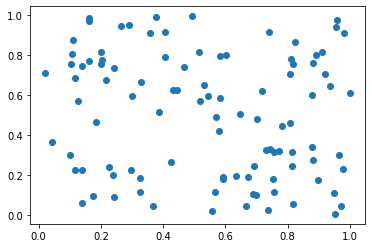

In [3]:
plt.scatter(population[:, 0], population[:, 1])

In [4]:
virus = np.array([[.8, .8]])

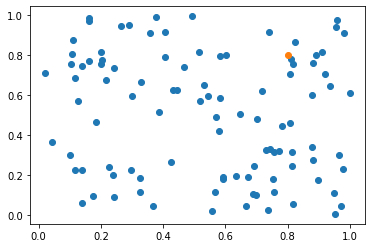

In [5]:
plt.scatter(population[:, 0], population[:, 1])
plt.scatter(virus[:, 0], virus[:, 1])

In [6]:
population[np.sqrt(np.sum((population-virus)**2,axis=1)).argsort()][:10]

array([[0.8097009 , 0.78018033],
       [0.81876275, 0.75521668],
       [0.82453697, 0.86523067],
       [0.89113065, 0.80099711],
       [0.88346353, 0.76258324],
       [0.80955013, 0.70295732],
       [0.91192376, 0.81666064],
       [0.74202297, 0.91805737],
       [0.91999323, 0.70741604],
       [0.71952525, 0.62188805]])

In [7]:
def fitness(population, virus):
    values = np.sum((population - virus) ** 2, axis=1)
    indices = values.argsort()
    return indices
    

In [8]:
fit = population[fitness(population, virus)[:10]]


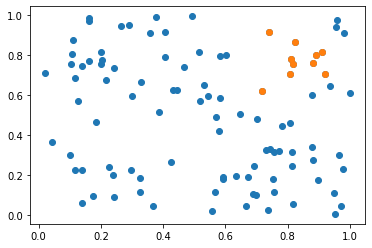

In [9]:
plt.scatter(population[:, 0], population[:, 1])
plt.scatter(fit[:, 0], fit[:, 1])



In [10]:
fit

array([[0.8097009 , 0.78018033],
       [0.81876275, 0.75521668],
       [0.82453697, 0.86523067],
       [0.89113065, 0.80099711],
       [0.88346353, 0.76258324],
       [0.80955013, 0.70295732],
       [0.91192376, 0.81666064],
       [0.74202297, 0.91805737],
       [0.91999323, 0.70741604],
       [0.71952525, 0.62188805]])

In [11]:
first = random.choice(fit)

In [12]:
first

array([0.81876275, 0.75521668])

In [13]:
second = random.choice(fit)

In [14]:
second

array([0.71952525, 0.62188805])

In [15]:
child = np.array([first[0], second[1]]) # assumption

In [16]:
child

array([0.81876275, 0.62188805])

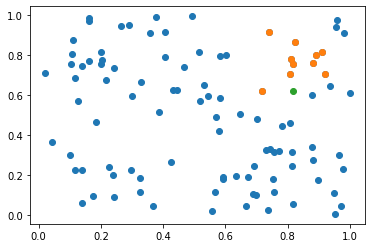

In [17]:
plt.scatter(population[:, 0], population[:, 1])
plt.scatter(fit[:, 0], fit[:, 1])
plt.scatter(np.array([child])[:, 0], np.array([child])[:, 1])

In [18]:
def populate(population, target):
    
    gen = []
    
    for i in range(target):
        #selection part
        first = random.choice(population)
        second = random.choice(population)
        child = np.array([first[0], second[1]])
        
        gen.append(child)
        
    
    
    genrated = np.array(gen) 
    noise = np.random.randn(100, 2) * (.1) #basically this is mutation part
    
    return genrated + noise

In [19]:
next_gen = populate(fit, 100)

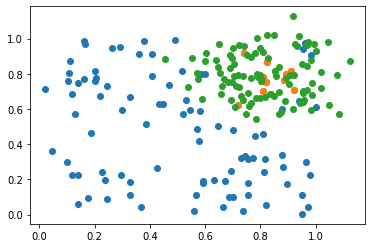

In [20]:
plt.scatter(population[:, 0], population[:, 1])
plt.scatter(fit[:, 0], fit[:, 1])
plt.scatter(next_gen[:, 0], next_gen[:, 1])

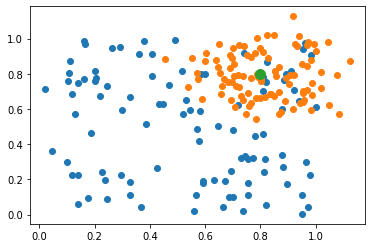

In [21]:
plt.scatter(population[:, 0], population[:, 1])
plt.scatter(next_gen[:, 0], next_gen[:, 1])

plt.scatter(virus[:, 0], virus[:, 0], s=100)

In [22]:
population.std()

0.2968967263733949

In [23]:
noise = np.random.randn(100, 2) * (.1)

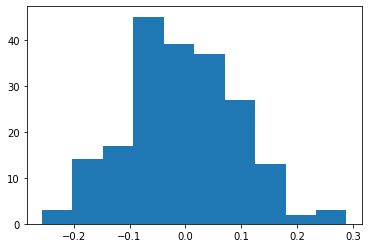

In [24]:
out = plt.hist(noise.flatten(), bins=10)

In [27]:
population = np.random.rand(100, 2)
virus = np.array([.5, .5])


In [30]:
values = np.sqrt(np.sum((population - virus) ** 2, axis=1))

array([ 5,  8, 10, 19, 20, 23, 24, 29, 35, 36, 39, 41, 52, 54, 55, 57, 59,
       61, 62, 66, 67, 71, 73, 78, 85, 90, 91, 95, 98])

In [37]:
thresh = 0.5
fit = np.argwhere(values>thresh).flatten()
unfit = np.argwhere(values<=thresh).flatten()
print(fit.shape, unfit.shape)
indices = np.concatenate([fit, unfit])

(29,) (71,)


In [39]:
fit

array([ 5,  8, 10, 19, 20, 23, 24, 29, 35, 36, 39, 41, 52, 54, 55, 57, 59,
       61, 62, 66, 67, 71, 73, 78, 85, 90, 91, 95, 98])

In [40]:
unfit

array([ 0,  1,  2,  3,  4,  6,  7,  9, 11, 12, 13, 14, 15, 16, 17, 18, 21,
       22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 37, 38, 40, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 53, 56, 58, 60, 63, 64, 65, 68, 69, 70, 72,
       74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 92, 93, 94,
       96, 97, 99])

In [38]:
indices

array([ 5,  8, 10, 19, 20, 23, 24, 29, 35, 36, 39, 41, 52, 54, 55, 57, 59,
       61, 62, 66, 67, 71, 73, 78, 85, 90, 91, 95, 98,  0,  1,  2,  3,  4,
        6,  7,  9, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 25, 26, 27, 28,
       30, 31, 32, 33, 34, 37, 38, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 53, 56, 58, 60, 63, 64, 65, 68, 69, 70, 72, 74, 75, 76, 77, 79,
       80, 81, 82, 83, 84, 86, 87, 88, 89, 92, 93, 94, 96, 97, 99])

In [41]:
def fitness(population, virus):
    thresh = 1
    values = np.sqrt(np.sum((population - virus) ** 2, axis=1))
    fit = np.argwhere(values>thresh).flatten()
    unfit = np.argwhere(values<=thresh).flatten()
    print(fit.shape, unfit.shape)
    indices = np.concatenate([fit, unfit])
    return indices
    

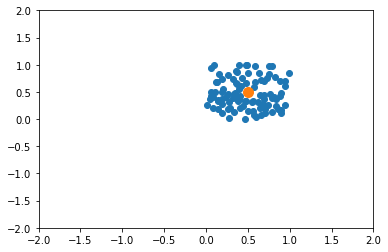

(0,) (100,)


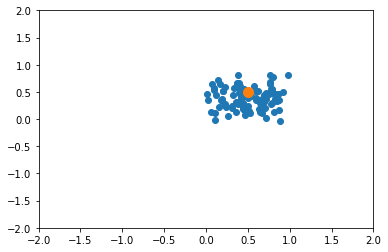

(0,) (100,)


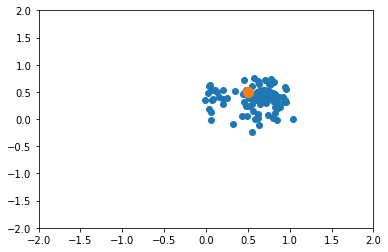

(0,) (100,)


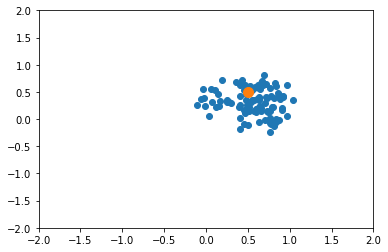

(0,) (100,)


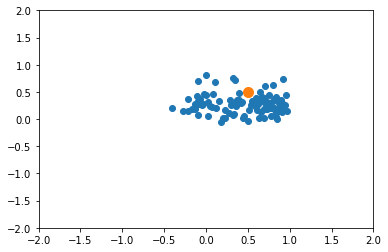

(0,) (100,)


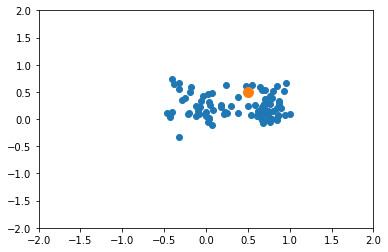

(4,) (96,)


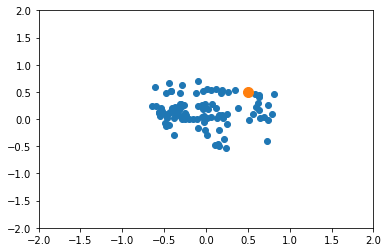

(22,) (78,)


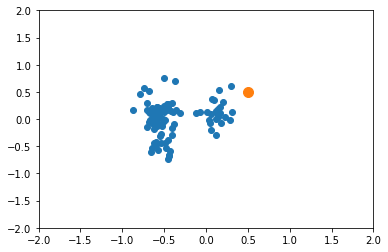

(66,) (34,)


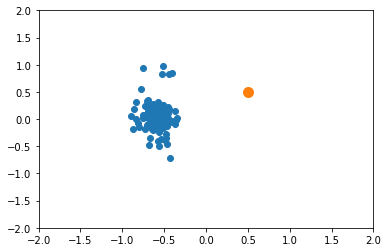

(95,) (5,)


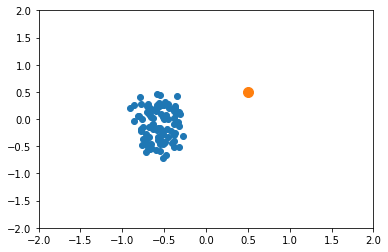

(90,) (10,)


In [26]:


population = np.random.rand(100, 2)
virus = np.array([.5, .5])

for genration in range(10):
    plt.figure()
    plt.scatter(population[:, 0], population[:, 1])
    plt.scatter(virus[0], virus[1], s=100)
    
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.show()
    
    fitness_index = fitness(population, virus)
    fit = population[fitness_index[:10]]
    population = populate(fit, 100)
    
    

In [86]:
np.concatenate?

Docstring:
concatenate((a1, a2, ...), axis=0, out=None)

Join a sequence of arrays along an existing axis.

Parameters
----------
a1, a2, ... : sequence of array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int, optional
    The axis along which the arrays will be joined.  If axis is None,
    arrays are flattened before use.  Default is 0.
out : ndarray, optional
    If provided, the destination to place the result. The shape must be
    correct, matching that of what concatenate would have returned if no
    out argument were specified.

Returns
-------
res : ndarray
    The concatenated array.

See Also
--------
ma.concatenate : Concatenate function that preserves input masks.
array_split : Split an array into multiple sub-arrays of equal or
              near-equal size.
split : Split array into a list of multiple sub-arrays of equal size.
hsplit : Split array into multiple sub-arrays horizontally 

In [62]:
np.arange(3)[True, True, False]

array([], shape=(0, 3), dtype=int64)

In [63]:
np.argwhere?

Signature: np.argwhere(a)
Docstring:
Find the indices of array elements that are non-zero, grouped by element.

Parameters
----------
a : array_like
    Input data.

Returns
-------
index_array : (N, a.ndim) ndarray
    Indices of elements that are non-zero. Indices are grouped by element.
    This array will have shape ``(N, a.ndim)`` where ``N`` is the number of
    non-zero items.

See Also
--------
where, nonzero

Notes
-----
``np.argwhere(a)`` is almost the same as ``np.transpose(np.nonzero(a))``,
but produces a result of the correct shape for a 0D array.

The output of ``argwhere`` is not suitable for indexing arrays.
For this purpose use ``nonzero(a)`` instead.

Examples
--------
>>> x = np.arange(6).reshape(2,3)
>>> x
array([[0, 1, 2],
       [3, 4, 5]])
>>> np.argwhere(x>1)
array([[0, 2],
       [1, 0],
       [1, 1],
       [1, 2]])
File:      ~/anaconda3/envs/mod/lib/python3.6/site-packages/numpy/core/numeric.py
Type:      function


In [70]:
np.argwhere(np.array([10, 23, 11]) > 12)

array([[1]])